# 7 classes
https://keras.io/guides/transfer_learning/#:~:text=A%20last%2C%20optional%20step%2C%20is,features%20to%20the%20new%20data.
end-to-end transfer learning model with keras exmaple dogs and cats

In [46]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np
input_shape = (48, 48, 3)

In [64]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [65]:
# We freeze every layer in our base model so that they do not train, we want that our feature extractor stays as before --> transfer learning
for layer in base_model.layers: 
    layer.trainable = False
    print('Layer ' + layer.name + ' frozen.')
# We take the last layer of our the model and add it to our classifier
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(7, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)
# We compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Layer input_4 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
___________________________________

In [68]:
NUM_CLASSES = 7
CHANNELS = 3

IMAGE_RESIZE = 48
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [69]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
image_size = IMAGE_RESIZE

train_dir1 = "/notebooks/data7cls_newimg_randomsplit/train/"
valid_dir1 = "/notebooks/data7cls_newimg_randomsplit/validation/"

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_dir1,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        valid_dir1,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 25585 images belonging to 7 classes.
Found 6263 images belonging to 7 classes.


In [72]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
#cb_checkpointer = ModelCheckpoint(filepath = '/notebooks/W251_FinalProject/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
cb_checkpointer = ModelCheckpoint(filepath = '/notebooks/best2.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [73]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]

)

Epoch 1/10
10/10 [==============================] - 21s 2s/step - loss: 7.3495 - acc: 0.3640 - val_loss: 6.3857 - val_acc: 0.4120
Epoch 2/10
10/10 [==============================] - 21s 2s/step - loss: 6.5195 - acc: 0.3880 - val_loss: 5.7520 - val_acc: 0.4200
Epoch 3/10
10/10 [==============================] - 20s 2s/step - loss: 6.2709 - acc: 0.3990 - val_loss: 5.5861 - val_acc: 0.4289
Epoch 4/10
10/10 [==============================] - 21s 2s/step - loss: 6.2471 - acc: 0.3920 - val_loss: 5.5056 - val_acc: 0.3940
Epoch 5/10
10/10 [==============================] - 21s 2s/step - loss: 5.9277 - acc: 0.3910 - val_loss: 5.0170 - val_acc: 0.4390
Epoch 6/10
10/10 [==============================] - 20s 2s/step - loss: 5.3619 - acc: 0.3910 - val_loss: 4.3443 - val_acc: 0.4410
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 5.0969 - acc: 0.3950 - val_loss: 3.9918 - val_acc: 0.4470
Epoch 8/10
10/10 [==============================] - 21s 2s/step - loss: 4.3875 - acc: 0.41

In [76]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 25585 images belonging to 7 classes.
# Found 6263 images belonging to 7 classes.
nb_train_samples = 25585
nb_validation_samples = 6263
batch_size=BATCH_SIZE_TESTING
# We need to recreate our validation generator with shuffle = false
validation_generator = data_generator.flow_from_directory(
        directory = '/notebooks/data7cls_newimg_randomsplit/validation',
        #color_mode = 'grayscale',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TESTING,
        class_mode='categorical',
        shuffle=False,
        seed=123)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
# print('Classification Report')
# target_names = list(class_labels.values())
# print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# plt.figure(figsize=(8,8))
# cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

# plt.imshow(cnf_matrix, interpolation='nearest')
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# _ = plt.xticks(tick_marks, classes, rotation=90)
# _ = plt.yticks(tick_marks, classes)

Found 6263 images belonging to 7 classes.
Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [6263, 6264]

# preivous code

In [1]:
# Fixed classes
NUM_CLASSES = 7
CHANNELS = 3

IMAGE_RESIZE = 48
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [2]:
resnet_weights_path = '/notebooks/W251_FinalProject/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [6]:
#Still not talking about our train/test data or any pre-processing.
model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))

# 2nd layer as Dense for 7-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 23,602,055
Trainable params: 14,343
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [23]:
# ! rmdir /notebooks/data7cls_newing_randomsplit/train/.ipynb_checkpoints
# ! rmdir /notebooks/data7cls_newing_randomsplit/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data7cls_newing_randomsplit/train/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/notebooks/data7cls_newing_randomsplit/validation/.ipynb_checkpoints': No such file or directory


In [28]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
image_size = IMAGE_RESIZE

train_dir1 = "/notebooks/data7cls_newimg_randomsplit/train/"
valid_dir1 = "/notebooks/data7cls_newimg_randomsplit/validation/"

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        train_dir1,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        valid_dir1,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 25585 images belonging to 7 classes.
Found 6263 images belonging to 7 classes.


In [29]:
print(validation_generator.class_indices)

{'distracted': 2, 'confused': 1, 'sad': 5, 'neutral': 4, 'angry': 0, 'happy': 3, 'surprise': 6}


In [30]:
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(100, 256, 100, 63)

In [66]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
#cb_checkpointer = ModelCheckpoint(filepath = '/notebooks/W251_FinalProject/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
cb_checkpointer = ModelCheckpoint(filepath = '/notebooks/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [67]:
# import keras
# filepath = os.path.join("/notebooks/littleVGG7cls/model_transferlearn_{epoch}.hdf5")

# checkpoint = keras.callbacks.ModelCheckpoint(filepath,
#                                              monitor='val_acc',
#                                              verbose=1,
#                                              save_best_only=True,
#                                              mode='max')
# callbacks = [checkpoint]

fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]

)
#model.load_weights('/notebooks/W251_FinalProject/best.hdf5')



Epoch 1/10
256/256 [==============================] - 359s 1s/step - loss: 1.6418 - acc: 0.4504 - val_loss: 1.8869 - val_acc: 0.4025
Epoch 2/10
256/256 [==============================] - 360s 1s/step - loss: 1.6379 - acc: 0.4564 - val_loss: 1.8980 - val_acc: 0.4110
Epoch 3/10
256/256 [==============================] - 360s 1s/step - loss: 1.6508 - acc: 0.4486 - val_loss: 1.8992 - val_acc: 0.4285
Epoch 4/10
256/256 [==============================] - 360s 1s/step - loss: 1.6477 - acc: 0.4514 - val_loss: 1.8311 - val_acc: 0.4222
Epoch 5/10
256/256 [==============================] - 360s 1s/step - loss: 1.6334 - acc: 0.4527 - val_loss: 1.9143 - val_acc: 0.4121
Epoch 6/10
256/256 [==============================] - 358s 1s/step - loss: 1.6371 - acc: 0.4606 - val_loss: 1.8842 - val_acc: 0.4091
Epoch 7/10
256/256 [==============================] - 360s 1s/step - loss: 1.6344 - acc: 0.4529 - val_loss: 1.8765 - val_acc: 0.4191


Found 6263 images belonging to 7 classes.
Confusion Matrix
[[282   0   8 270 150 143 107]
 [  1 146   6   6   0   2   1]
 [  0  17 140   3   2   0   2]
 [265   6   6 975 248 192 133]
 [207   3   6 407 331 142 120]
 [202   3   2 357 182 303  90]
 [ 91   2   0 125  82  49 448]]
Classification Report
              precision    recall  f1-score   support

       angry       0.27      0.29      0.28       960
    confused       0.82      0.90      0.86       162
  distracted       0.83      0.85      0.84       164
       happy       0.45      0.53      0.49      1825
     neutral       0.33      0.27      0.30      1216
         sad       0.36      0.27      0.31      1139
    surprise       0.50      0.56      0.53       797

    accuracy                           0.42      6263
   macro avg       0.51      0.53      0.52      6263
weighted avg       0.41      0.42      0.41      6263



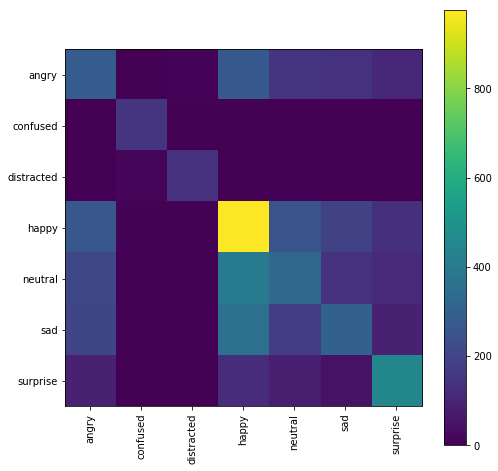

In [68]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
# Found 25585 images belonging to 7 classes.
# Found 6263 images belonging to 7 classes.
nb_train_samples = 25585
nb_validation_samples = 6263
batch_size=BATCH_SIZE_TESTING
# We need to recreate our validation generator with shuffle = false
validation_generator = data_generator.flow_from_directory(
        directory = '/notebooks/data7cls_newimg_randomsplit/validation',
        #color_mode = 'grayscale',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TESTING,
        class_mode='categorical',
        shuffle=False,
        seed=123)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [69]:
cnf_matrix

array([[282,   0,   8, 270, 150, 143, 107],
       [  1, 146,   6,   6,   0,   2,   1],
       [  0,  17, 140,   3,   2,   0,   2],
       [265,   6,   6, 975, 248, 192, 133],
       [207,   3,   6, 407, 331, 142, 120],
       [202,   3,   2, 357, 182, 303,  90],
       [ 91,   2,   0, 125,  82,  49, 448]])

In [70]:
cm=cnf_matrix
cm = cm.astype('float') / cm.sum(axis=1)[:,None]
cm

array([[0.29375   , 0.        , 0.00833333, 0.28125   , 0.15625   ,
        0.14895833, 0.11145833],
       [0.00617284, 0.90123457, 0.03703704, 0.03703704, 0.        ,
        0.01234568, 0.00617284],
       [0.        , 0.10365854, 0.85365854, 0.01829268, 0.01219512,
        0.        , 0.01219512],
       [0.14520548, 0.00328767, 0.00328767, 0.53424658, 0.13589041,
        0.10520548, 0.07287671],
       [0.17023026, 0.00246711, 0.00493421, 0.33470395, 0.27220395,
        0.11677632, 0.09868421],
       [0.17734855, 0.00263389, 0.00175593, 0.31343284, 0.15978929,
        0.26602283, 0.07901668],
       [0.11417817, 0.00250941, 0.        , 0.15683814, 0.10288582,
        0.06148055, 0.5621079 ]])

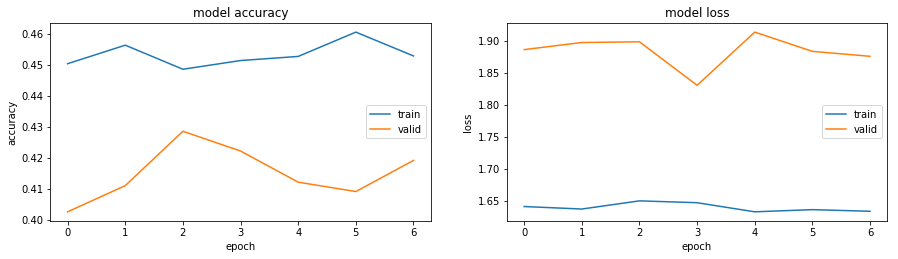

In [71]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

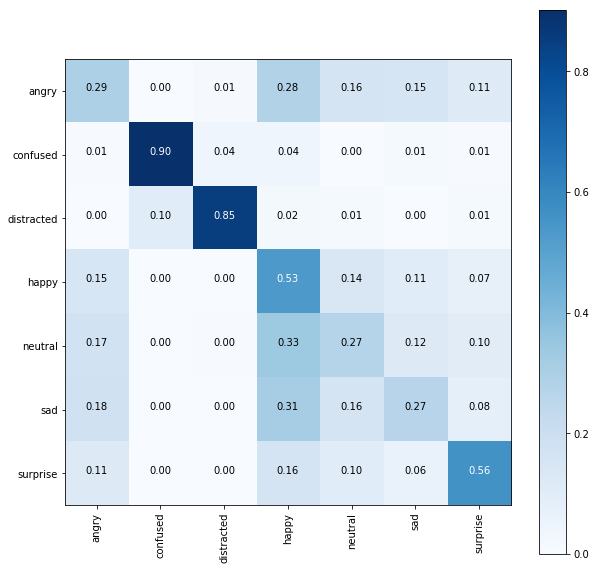

In [72]:
import itertools
cm=cnf_matrix
cm = cm.astype('float') / cm.sum(axis=1)[:,None]
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")